In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from Modules import Cleaner as cl
from Modules import DataSource

In [16]:
## Clustering around KM per liter VS Horsepower

dataset = cl.get_and_clean_df('./data/bilhandel_clean.csv')
#dataset = dataset[dataset['Make'] == 'Mazda']
display(dataset)
features = dataset[['Km/l','Hestekræfter']]

./data/bilhandel_clean.csv


Brændstoftype   Gearkasse     Make                            Model  \
0            Diesel      Manuel  Peugeot                407 1,6 HDi XR SW   
2            Diesel  Automatisk    Skoda  Superb 2,0 TDi 150 Ambition DSG   
3            Benzin  Automatisk       VW   Passat 1,4 GTE Variant DSG Van   
4            Benzin      Manuel      Kia             Rio 1,2 CVVT Collect   
5            Diesel      Manuel  Peugeot                407 1,6 HDi XR SW   
...             ...         ...      ...                              ...   
19994        Benzin      Manuel     Seat             Mii 1,0 60 Style eco   
19995        Benzin  Automatisk      BMW                    530i 2,0 aut.   
19996        Benzin  Automatisk       VW    Polo 1,0 TSi 115 Highline DSG   
19997        Benzin      Manuel    Skoda     Octavia 1,2 TSi 105 Ambiente   
19998        Benzin      Manuel  Peugeot                206+ 1,4 Comfort+   

       Antal døre  Grøn Ejerafgift  Hestekræfter  Kilometer  Km/l  Antal gear  \
0             5.0           6540.0         110.0   292000.0  17.9         6.0   
2             5.0           3880.0         150.0   243000.0  22.2         6.0   
3             5.0            660.0         218.0    75000.0  32.3         6.0   
4             5.0            660.0          86.0   107000.0  21.3         5.0   
5             5.0           6540.0         110.0   292000.0  17.9         6.0   
...           ...              ...           ...        ...   ...         ...   
19994         5.0            660.0          60.0   156000.0  24.4         5.0   
19995         4.0           1780.0         252.0    57000.0  18.2         8.0   
19996         5.0           1080.0         115.0     5000.0  22.9         7.0   
19997         5.0           1880.0         105.0   156000.0  17.5         6.0   
19998         5.0           2520.0          75.0   156000.0  15.9         5.0   

       0 - 100 km/t    Nypris    Pris  Tophastighed    Vægt  Årgang  
0              13.7  307689.0   14700         189.0  1475.0    2005  
2               8.9  436000.0  169700         218.0  1400.0    2016  
3               7.6  318324.0    2495         225.0  1635.0    2018  
4              13.1  139998.0   69800         168.0  1158.0    2014  
5              13.7  307689.0   14700         189.0  1475.0    2005  
...             ...       ...     ...           ...     ...     ...  
19994          14.4  102402.0   49999         161.0   940.0    2014  
19995           6.2  662193.0  459900         250.0  1515.0    2018  
19996           9.5  216117.0  249500         200.0  1090.0    2020  
19997          10.8  224002.0   64900         192.0  1170.0    2011  
19998          15.0  149992.0   29900         173.0   975.0    2009  

[12009 rows x 16 columns]

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

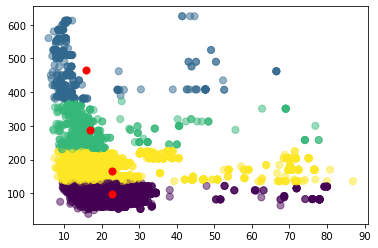

In [18]:
# Plot our data about the cars (KmPerLiter VS Hestekræfter) and the centroids we have found for the clusters
plt.scatter(dataset['Km/l'], dataset['Hestekræfter'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

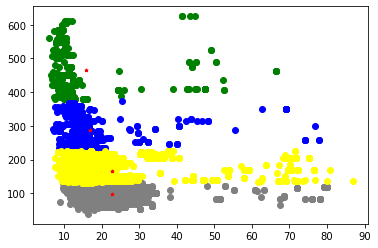

In [19]:
prediction = kmeans.predict(features)
dataset['cluster'] = prediction
cluster_one = dataset[dataset['cluster'] == 0][['Km/l','Hestekræfter']]
cluster_two = dataset[dataset['cluster'] == 1][['Km/l','Hestekræfter']]
cluster_three = dataset[dataset['cluster'] == 2][['Km/l','Hestekræfter']]
cluster_four = dataset[dataset['cluster'] == 3][['Km/l','Hestekræfter']]
# cluster_five = dataset[dataset['cluster'] == 4][['Km/l','Hestekræfter']]
# cluster_six = dataset[dataset['cluster'] == 5][['Km/l','Hestekræfter']]

plt.scatter(cluster_one['Km/l'], cluster_one['Hestekræfter'], c="grey")
plt.scatter(cluster_two['Km/l'], cluster_two['Hestekræfter'], c="green")
plt.scatter(cluster_three['Km/l'], cluster_three['Hestekræfter'], c="blue")
plt.scatter(cluster_four['Km/l'], cluster_four['Hestekræfter'], c="yellow")
# plt.scatter(cluster_five['Km/l'], cluster_five['Hestekræfter'], c="pink")
# plt.scatter(cluster_six['Km/l'], cluster_six['Hestekræfter'], c="cyan")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, marker='*')

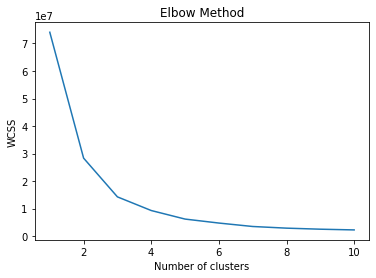

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

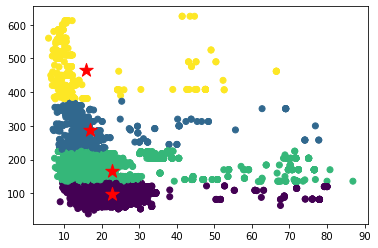

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
display(pred_y)
plt.scatter(features['Km/l'], features['Hestekræfter'], c=kmeans.labels_.astype('float'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')